In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
import jupyter_black

jupyter_black.load()

# Primeira parte: Pressão x Volume

In [5]:
first_pressure = np.array(
    [628, 579, 530, 481, 431, 382, 332, 282, 233, 183, 135, 89, 55, 38, 32, 33, 28, 27]
)

first_volume = np.array(
    [
        0.005,
        0.006,
        0.007,
        0.008,
        0.008,
        0.009,
        0.009,
        0.009,
        0.010,
        0.010,
        0.012,
        0.016,
        0.032,
        0.065,
        0.109,
        0.160,
        0.205,
        0.230,
    ]
)

In [6]:
def first_fitting_function(x, yo, a, b):
    return yo + a * np.exp(-b * x)

In [7]:
popt_first, pcov_first = opt.curve_fit(
    first_fitting_function, first_volume, first_pressure
)
perr_first = np.sqrt(np.diag(pcov_first))

y0, a, b = popt_first
Delta_y0, Delta_a, Delta_b = perr_first

In [8]:
x_model = np.linspace(min(first_volume), max(first_volume), 1000)
y_model = first_fitting_function(x_model, *popt_first)

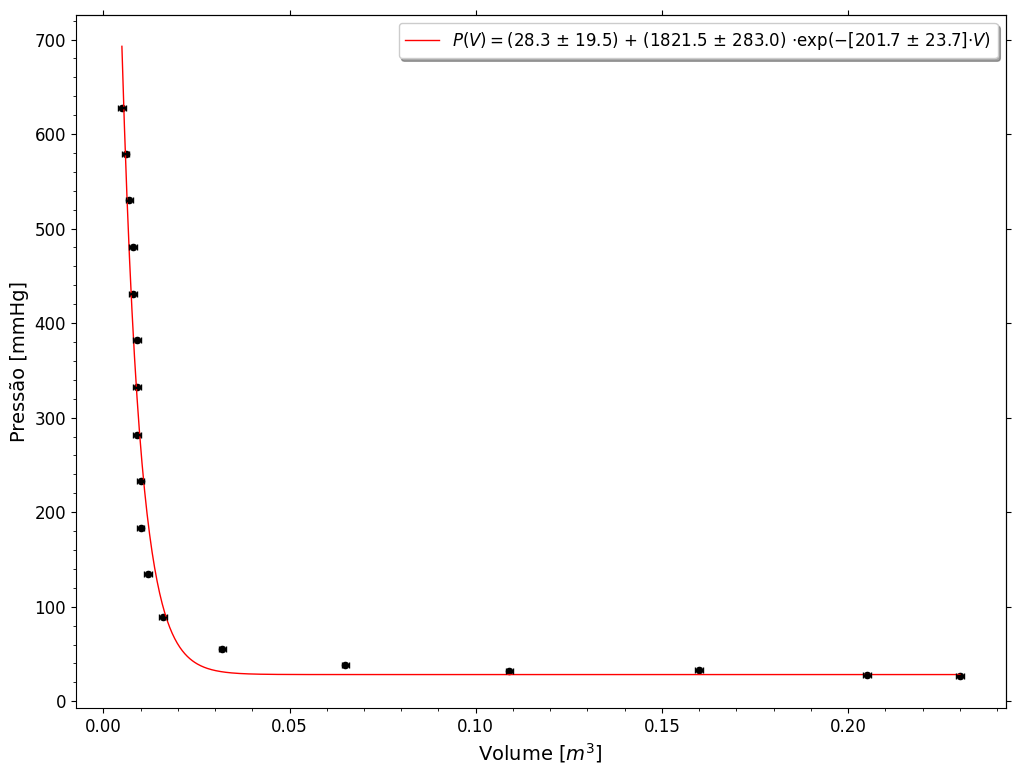

In [9]:
fig_first, ax_first = plt.subplots(figsize=(12, 9))
ax_first.plot(x_model, y_model, color="red", linewidth=1)
ax_first.scatter(first_volume, first_pressure, color="black", marker="o", s=20)
ax_first.set_xlabel("Volume [$m^3$]")
ax_first.set_ylabel("Pressão [mmHg]")
ax_first.secondary_xaxis("top").set_xticklabels([])
ax_first.secondary_yaxis("right").set_yticklabels([])
ax_first.minorticks_on()
ax_first.errorbar(
    first_volume,
    first_pressure,
    xerr=0.001,
    yerr=0.6,
    fmt="none",
    ecolor="black",
    capsize=2,
    capthick=1,
    elinewidth=1,
)
ax_first.xaxis.label.set_fontsize(14)
ax_first.yaxis.label.set_fontsize(14)
ax_first.tick_params(axis="both", which="major", labelsize=12)
texts = f"$P(V) = $({y0:.1f} $\pm$ {Delta_y0:.1f}) + ({a:.1f} $\pm$ {Delta_a:.1f}) $\cdot \exp(- [${b:.1f} $\pm$ {Delta_b:.1f}]$\cdot V)$"
ax_first.legend(
    [texts],
    loc="upper right",
    fontsize=12,
    shadow=True,
)
plt.show()

# Segunda parte: Pressão x Temperatura

In [10]:
second_pressure = np.array([9, 9, 13, 14.5, 22, 39.5, 67, 107, 184, 295])
second_temperatue = np.array([4, 9, 13, 16, 22, 32, 41, 50, 61, 71])

In [11]:
def second_fitting_function(x, yi, c, d):
    return yi + c * np.exp(-d / (x + 273.15))

In [12]:
popt_second, pcov_second = opt.curve_fit(
    second_fitting_function,
    second_temperatue,
    second_pressure,
    p0=[0, 0, 0],
)
perr_second = np.sqrt(np.diag(pcov_second))

yi, c, d = popt_second
Delta_yi, Delta_c, Delta_d = perr_second

print("yi = ", yi, "Delta_yi = ", Delta_yi)
print("c = ", c, "Delta_c = ", Delta_c)
print("d = ", d, "Delta_d = ", Delta_d)

yi =  0.6717668990549099 Delta_yi =  0.6736150077207456
c =  1988799222.1145437 Delta_c =  285262501.90668005
d =  5412.237127650252 Delta_d =  49.46940542750476


In [13]:
x_model = np.linspace(min(second_temperatue), max(second_temperatue), 1000)
y_model = second_fitting_function(x_model, *popt_second)

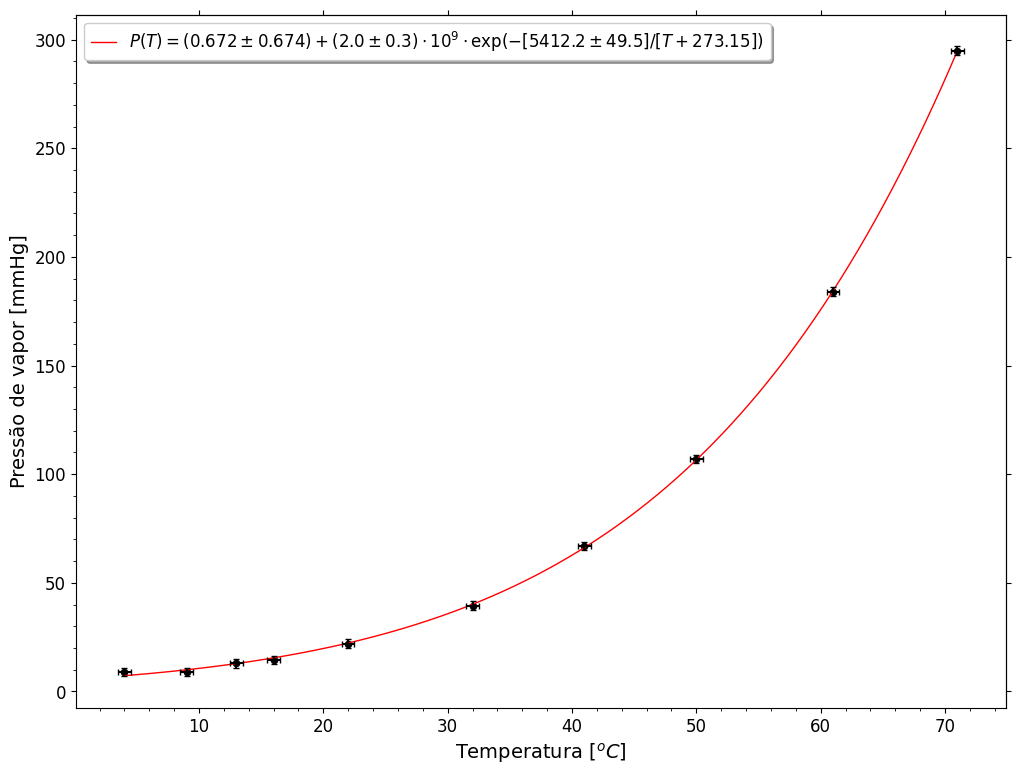

In [17]:
fig_second, ax_second = plt.subplots(figsize=(12, 9))
ax_second.plot(x_model, y_model, color="red", linewidth=1)
ax_second.scatter(second_temperatue, second_pressure, color="black", marker="o", s=20)
ax_second.set_xlabel("Temperatura [$^oC$]")
ax_second.set_ylabel("Pressão de vapor [mmHg]")
ax_second.secondary_xaxis("top").set_xticklabels([])
ax_second.secondary_yaxis("right").set_yticklabels([])
ax_second.minorticks_on()
ax_second.errorbar(
    second_temperatue,
    second_pressure,
    xerr=0.5,
    yerr=2,
    fmt="none",
    ecolor="black",
    capsize=2,
)
ax_second.xaxis.label.set_fontsize(14)
ax_second.yaxis.label.set_fontsize(14)
ax_second.tick_params(axis="both", which="major", labelsize=12)
texts = f"$P(T) = ({yi:.3f} \pm {Delta_yi:.3f})+({c/10**9:.1f} \pm {Delta_c/10**9:.1f}) \cdot 10^9 \cdot \exp(-[{d:.1f} \pm {Delta_d:.1f}] / [T + 273.15])$"
ax_second.legend(
    [texts],
    loc="upper left",
    handlelength=1.5,
    fontsize=12,
    shadow=True,
)
plt.show()